# 🧩 1. 📥 Load and Visualize Hyperspectral Data

In [17]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Load hyperspectral image and ground truth labels
dataset = loadmat('data/Indian_pines_corrected.mat')['indian_pines_corrected']
ground_truth = loadmat('data/Indian_pines_gt.mat')['indian_pines_gt']


In [18]:
dataset.shape 

(145, 145, 200)

In [19]:
# Step 2: Get the shape of the hyperspectral image
rows, cols, bands = dataset.shape  # (145, 145, 200)

# Step 3: Flatten both the image and the labels
X_flat = dataset.reshape(rows * cols, bands)         # shape: (21025, 200)
y_flat = ground_truth.reshape(rows * cols)           # shape: (21025,)

# Step 4: Create a pandas DataFrame for the spectral data
df = pd.DataFrame(X_flat)

# Step 5: Add the ground truth labels as a new column
df['label'] = y_flat

# Step 6: View the first few rows
df.head()


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


Image shape: (145, 145, 200)
Ground truth shape: (145, 145)


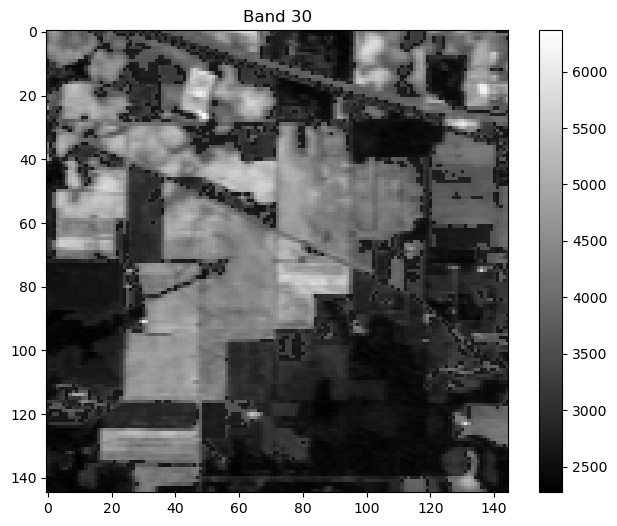

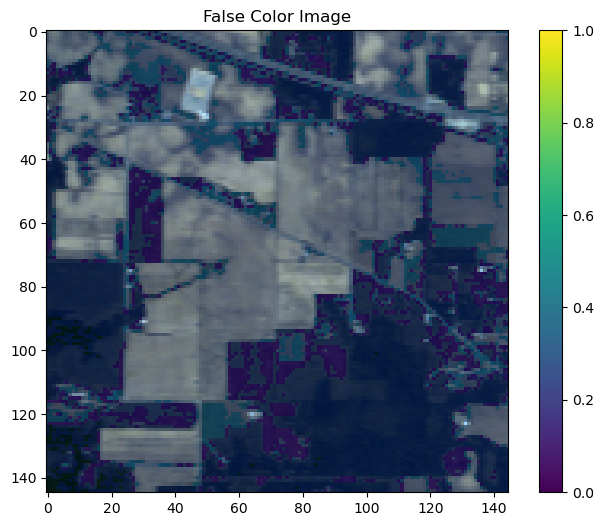

In [20]:
print("Image shape:", dataset.shape)        # (145, 145, 200)
print("Ground truth shape:", ground_truth.shape)  # (145, 145)



# Visualize Band 30
plt.figure(figsize=(8, 6))
plt.imshow(dataset[:, :, 30], cmap='gray')
plt.title("Band 30")
plt.colorbar()
plt.show()

# False-color RGB image using bands 30 (R), 20 (G), 10 (B)
plt.figure(figsize=(8, 6))
r, g, b = 30, 20, 10
rgb_img = dataset[:, :, [r, g, b]]
rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())  # normalize
plt.imshow(rgb_img)
plt.title("False Color Image")
plt.colorbar()

plt.show()


In [21]:
def plot_random_band_and_false_rgb(dataset):
    # Random band index
    band = np.random.randint(dataset.shape[2])
    print(f"Selected Band: {band}")

    # --- Plot the single band ---
    plt.figure(figsize=(8, 6))
    plt.imshow(dataset[:, :, band], cmap='jet')
    plt.title(f'Single Band Image (Band {band})')
    plt.axis('off')
    plt.colorbar()
    plt.show()

    # --- Select 3 bands for RGB ---
    # You can select nearby bands or completely random
    band_indices = np.random.choice(dataset.shape[2], size=3, replace=False)
    r, g, b = band_indices
    #r, g, b = 30, 20, 10
    print(f"RGB Bands: R={r}, G={g}, B={b}")

    # Extract and normalize RGB image
    rgb_img = dataset[:, :, [r, g, b]]
    rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())

    # --- Plot the false-color image ---
    plt.figure(figsize=(8, 6))
    plt.imshow(rgb_img)
    plt.title(f'False Color RGB Image (R={r}, G={g}, B={b})')
    plt.axis('off')
    plt.colorbar()
    plt.show()


Selected Band: 141


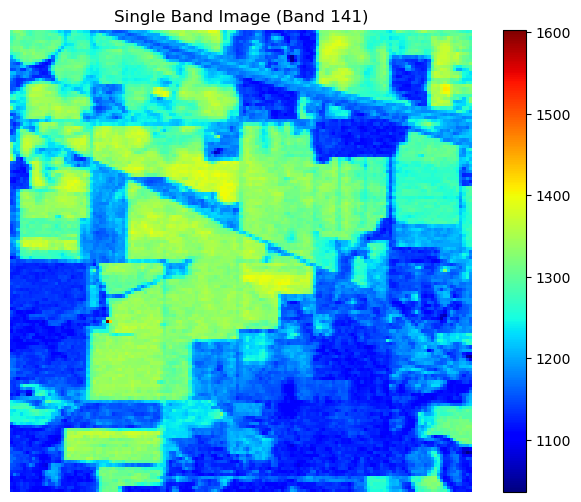

RGB Bands: R=13, G=77, B=158


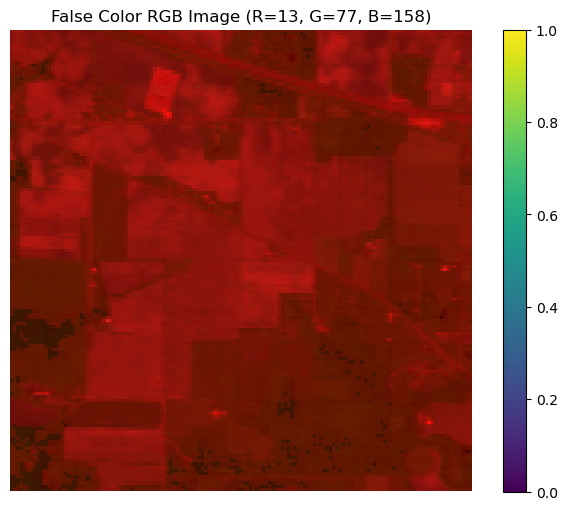

In [22]:
plot_random_band_and_false_rgb(dataset)


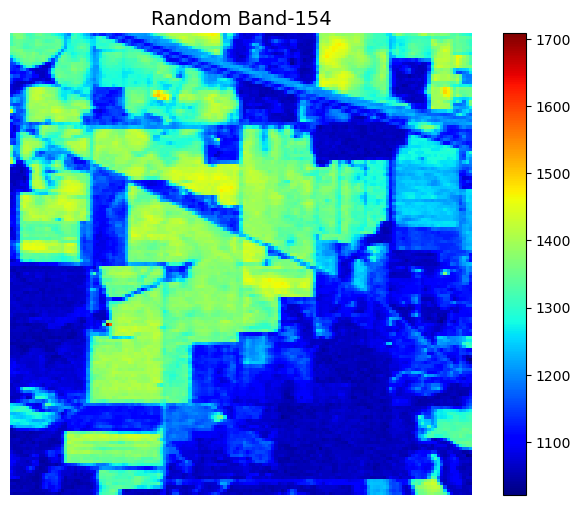

Displayed Band: 154


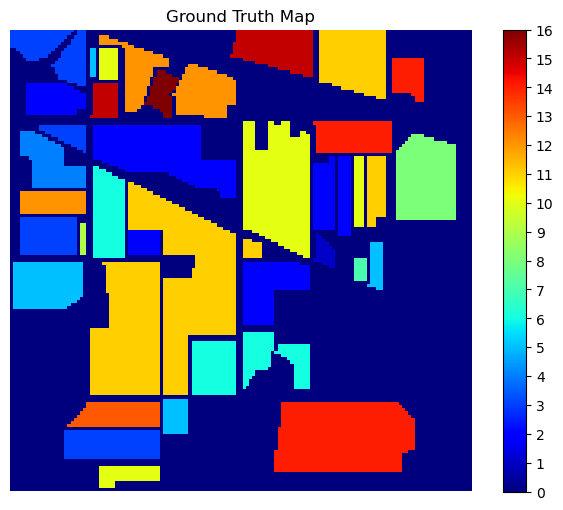

In [23]:
def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:, :, band_no], cmap='jet')
    plt.title(f'Random Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()
    return band_no  # optional

def plot_random_band_and_gt(dataset, ground_truth):
    band_no = plot_band(dataset)
    print(f"Displayed Band: {band_no}")  # optional for tracking

    plt.figure(figsize=(8, 6))
    plt.imshow(ground_truth, cmap='jet')
    plt.title("Ground Truth Map")
    plt.axis('off')
    plt.colorbar(ticks=range(0, 17))
    plt.show()

    
# Call it:
plot_random_band_and_gt(dataset, ground_truth)

# 🧩 2. 🧪 Flatten Data for Analysis (PCA, ML, DL)

In [68]:
# Flatten spatial dimensions
rows, cols, bands = dataset.shape
X = dataset
X_2d = X.reshape(-1, bands)  # shape: (145*145, 200)
y_1d = ground_truth.ravel()  # shape: (145*145,)


# 🧩 3. 🎯 Filter for Labeled Data Only

In [69]:
mask = y_1d > 0
X_filtered = X_2d[mask]
y_filtered = y_1d[mask]

print("Filtered data shape:", X_filtered.shape)
print("Filtered labels shape:", y_filtered.shape)


Filtered data shape: (10249, 200)
Filtered labels shape: (10249,)


# 🧩 4. ⚙️ PCA-Based Denoising

In [70]:
from sklearn.decomposition import PCA

# Apply PCA and reconstruct denoised image
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_filtered)
X_denoised = pca.inverse_transform(X_pca)

# Optional: visualize one band after PCA
img_pca_reshaped = X_denoised.reshape(-1, bands)  # only if needed


# 🧩 5. 🔧 Denoising Autoencoder (PyTorch)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class DenoisingAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 64))
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, input_dim))

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Simulate training data
x_clean = torch.rand(1000, 200)
noise = 0.1 * torch.randn_like(x_clean)
x_noisy = x_clean + noise

trainset = TensorDataset(x_noisy, x_clean)
loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Train model
model = DenoisingAutoencoder(input_dim=200)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):
    for noisy, clean in loader:
        output = model(noisy)
        loss = criterion(output, clean)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


# 🧩 6. 🧼 Total Variation Denoising (Single Band)

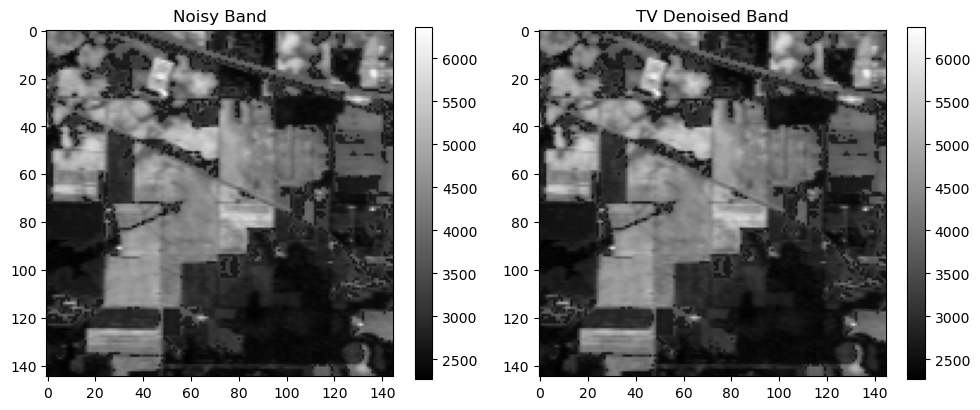

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage.restoration import denoise_tv_chambolle

# Load the dataset
data = loadmat('data/Indian_pines_corrected.mat')
dataset = data['indian_pines_corrected']

# Choose a spectral band to denoise
band = 30
noisy_band = dataset[:, :, band] + 0.05 * np.random.randn(*dataset[:, :, band].shape)

# Apply Total Variation denoising
denoised_band = denoise_tv_chambolle(noisy_band, weight=0.1)

# Plot the results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(noisy_band, cmap='gray')
plt.title("Noisy Band")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(denoised_band, cmap='gray')
plt.title("TV Denoised Band")
plt.colorbar()

plt.tight_layout()
plt.show()
